# Bike Sharing: Data Visualization Project
## by Maria Cambalova

## Introduction
In this project, the [data on rides made in a bike-sharing system](https://www.lyft.com/bikes/bay-wheels/system-data) is explored using various visualizations (univariate, bivariate and multivariate). The available data span over four years (2017-2020), but I'll use only data from years 2017 and 2018. One row or record is one bike ride. The data is anonymized.<br><br>
The data contains following features:
- __trip duration__ (`duration_sec`): total duration of one ride in seconds
- __start date and time__ (`start_time`): time and date when the ride started
- __end date and time__ (`end_time`): time and date when the ride ended
- __start station ID__ (`start_station_id`): start station identifier
- __start station name__ (`start_station_name`): name of the start station
- __start station latitude__ (`start_station_latitude`): the latitude coordinate of the start station
- __start station longitude__ (`start_station_longitude`): the longitude coordinate of the start station
- __end station ID__ (`end_station_id`): end station identifier
- __end station name__ (`end_station_name`): name of the start station
- __end station latitude__ (`end_station_latitude`): the latitude coordinate of the end station
- __end station longitude__ (`end_station_longitude`): the longitude coordinate of the end station
- __bike ID__ (`bike_id`): the bike identifier
- __user type__ (`user_type`): whether the user is a regular one, i.e. member ('Subscriber') or a casual one ('Customer')
- __Bike Share for All__ (`bike_share_for_all_trip`): whether the ride was within the [Bike Share for All](https://www.lyft.com/bikes/bay-wheels/bike-share-for-all) program, not available for 2017 rides

## Preliminary Wrangling

I'll divide this section into two parts: 
- [Data Gathering](#data_gathering) - download the data and load it into a dataframe
- [Data Wrangling](#data_wrangling) - quickly explore the data, clean if necessary and prepare it for further exploratory visualizations    

But first, import all packages used in data wrangling and subsequent visualizations:

In [1]:
# NumPy and Pandas
import numpy as np
import pandas as pd

# Packages to gather and manipulate with files
import glob
import os
import requests
import zipfile

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sb

# Set matplotlib backend
%matplotlib inline

<a name='data_gathering'></a>
### Data Gathering

I'd like to analyze bike-sharing data from the years 2017 and 2018. While there is only one file for 2017, the 2018 data is stored in separate month files (there are 12 files containing bike-sharing data for the year 2018). Therefore, I'll download the data programmatically: 
1. construct the file names using year, month and string '-fordgobike-tripdata.csv.zip' common for all the files
2. construct the full files' urls
3. download and store the files in the folder called 'data'  

When creating the file names using months, the numbers have to be padded with a leading zero. This can be accomplished using numpy's [zfill](https://numpy.org/doc/stable/reference/generated/numpy.char.zfill.html) method, as shown here: [Adding leading zeros to strings in NumPy array](https://stackoverflow.com/questions/55376333/adding-leading-zeros-to-strings-in-numpy-array).

In [2]:
# Create folder data to store csv files if the folder does not exist
folder_name = 'data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
# Create lists of years and months
years = ['2017', '2018']
months = months = np.char.zfill(np.arange(1, 13).astype(str), 2)

# Testing
# years = ['2017', '2018']
# months = months = np.char.zfill(np.arange(1, 2).astype(str), 2)

# Every file of interest ends with the following string - keep it in file_sfx
file_sfx = '-fordgobike-tripdata.csv.zip'

# The url address (without the file name)
url_pfx = 'https://s3.amazonaws.com/baywheels-data/'

# Loop over files - start with the year
for year in years:
    # There is only one file collecting all data in case of the year 2017
    if year == '2017':
        print('Downloading {}'.format(year + file_sfx))
        # Construct the full file name using year and file suffix
        file = year + file_sfx
        # Download the file and store it
        response = requests.get(url_pfx + file)
        with open(os.path.join(folder_name, file), mode = 'wb') as file:
            file.write(response.content)
    
    # Data for the year 2018 is in separate files according to months
    else:
        for month in months:
            print('Downloading {}'.format(year + month + file_sfx))
            # Construct the full file name using year, month and file suffix
            file = year + month + file_sfx
            # Download the file and store it
            response = requests.get(url_pfx + file)
            with open(os.path.join(folder_name, file), mode = 'wb') as file:
                file.write(response.content)

Next, unzip the compressed files after the data has been successfully downloaded using the [zipfile](https://docs.python.org/3/library/zipfile.html) module; see also [Unzipping files in Python](https://stackoverflow.com/questions/3451111/unzipping-files-in-python). Also, use the [glob](https://docs.python.org/3/library/glob.html) library to retrieve the names of zip files, as learnt in the Data Wrangling part of Data Analyst Nanodegree Program at Udacity.

In [4]:
# Loop over all downloaded files and extract csv files
for zip_file in glob.glob(folder_name + '/*.zip'):
    with zipfile.ZipFile(zip_file, mode = 'r') as file:
        file.extractall(folder_name)

Finally, load the data into a Pandas dataframe `bikes`:

In [5]:
# Create empty dataframe to store the data
bikes = pd.DataFrame()

# Loop over csv files and add them to the target dataframe one by one
for csv_file in glob.glob(folder_name + '/*.csv'):
    bikes_tmp = pd.read_csv(csv_file)
    bikes = pd.concat([bikes, bikes_tmp], ignore_index = True, axis = 0, sort = False)

<a name='data_wrangling'></a>
### Data Wrangling
Let's examine the bike-sharing data and decide which features would be interesting to look at:

In [6]:
# View the first few lines
bikes.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74.0,Laguna St at Hayes St,37.776435,-122.426244,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,NaN
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96.0,Dolores St at 15th St,37.766210,-122.426614,88,Customer,NaN
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245.0,Downtown Berkeley BART,37.870348,-122.267764,245.0,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,NaN
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60.0,8th St at Ringold St,37.774520,-122.409449,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,NaN
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,NaN


In [7]:
# View the last few lines
bikes.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
2383416,473,2018-12-01 00:11:54.8110,2018-12-01 00:19:48.5470,345.0,Hubbell St at 16th St,37.766474,-122.398295,81.0,Berry St at 4th St,37.775880,-122.393170,3035,Subscriber,No
2383417,841,2018-12-01 00:02:48.7260,2018-12-01 00:16:49.7660,10.0,Washington St at Kearny St,37.795393,-122.404770,58.0,Market St at 10th St,37.776619,-122.417385,2034,Subscriber,No
2383418,260,2018-12-01 00:05:27.6150,2018-12-01 00:09:47.9560,245.0,Downtown Berkeley BART,37.870139,-122.268422,255.0,Virginia St at Shattuck Ave,37.876573,-122.269528,2243,Subscriber,No
2383419,292,2018-12-01 00:03:06.5490,2018-12-01 00:07:59.0800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,126.0,Esprit Park,37.761634,-122.390648,545,Subscriber,No
2383420,150,2018-12-01 00:03:05.7420,2018-12-01 00:05:36.0260,107.0,17th St at Dolores St,37.763015,-122.426497,119.0,18th St at Noe St,37.761047,-122.432642,4319,Subscriber,No


There are 14 features - the meaning of each one is described in the introductory section. The full data contain information about bike-shares over the period of 2 years - it might get pretty big. Let's check it out:

In [8]:
# How big is the dataframe?
bikes.shape

(2383421, 14)

The `bikes` dataframe contains over two million records. Are there any duplicates?

In [9]:
# Check for duplicates
bikes[bikes.duplicated()].shape

(0, 14)

There aren't duplicates - no need to fix anything with respect to this.</br></br>
Examine data types:

In [10]:
# Print basic information - datatypes and null values
bikes.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2383421 entries, 0 to 2383420
Data columns (total 14 columns):
duration_sec               2383421 non-null int64
start_time                 2383421 non-null object
end_time                   2383421 non-null object
start_station_id           2371650 non-null float64
start_station_name         2371650 non-null object
start_station_latitude     2383421 non-null float64
start_station_longitude    2383421 non-null float64
end_station_id             2371650 non-null float64
end_station_name           2371650 non-null object
end_station_latitude       2383421 non-null float64
end_station_longitude      2383421 non-null float64
bike_id                    2383421 non-null int64
user_type                  2383421 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 200.0+ MB


Columns `start_time` and `end_time` are objects. However, I'd like to have information about year, month, day, day of a week, and hour of a day. These can be retrieved using Pandas Series' [Datetimelike properties](https://pandas.pydata.org/pandas-docs/stable/reference/series.html#datetimelike-properties). Therefore, I'll convert those two variables into datetime data type, create the respective columns afterwards and convert to categorical variables when appropriate.  

In [11]:
# Convert start time and end time to datetime format
bikes['start_time'] = pd.to_datetime(bikes['start_time'])
bikes['end_time'] = pd.to_datetime(bikes['end_time'])

In [12]:
# Create additional columns - year, month, day, day of week (Monday, Tuesday, etc.), hour
bikes['year'] = bikes['start_time'].dt.year
bikes['month'] = bikes['start_time'].dt.month_name()
bikes['day'] = bikes['start_time'].dt.day
bikes['weekday'] = bikes['start_time'].dt.day_name()
bikes['hour'] = bikes['start_time'].dt.hour

In [13]:
# Convert month to categorical variable
level_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
bikes['month'] = bikes['month'].astype(ordered_cat)

In [14]:
# Convert weekday to categorical variable
level_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
bikes['weekday'] = bikes['weekday'].astype(ordered_cat)

The `user_type` column would be better as a categorical variable for the visualization purposes:

In [15]:
# View user type variable values and their occurrence
bikes['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

In [16]:
# Convert user type to categorical variable
level_order = ['Customer', 'Subscriber']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)
bikes['user_type'] = bikes['user_type'].astype(ordered_cat)

Duration is in seconds - let's calculate duration in minutes since this unit is much more convenient when working with bike rides:

In [20]:
# Create new column with duration in minutes
bikes['duration_min'] = bikes['duration_sec'] / 60

The dataframe is quite big - remove columns that will not be used in further exploration: 

In [21]:
# Remove unnecessary columns
bikes = bikes.drop(['start_time', 'end_time', 'start_station_latitude', 'start_station_longitude', 
                    'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip', 'duration_sec'], axis = 1)

Let's verify that the `bikes` dataframe contains desired columns, and variables are of the proper data types:

In [22]:
# Check the result - correct datatypes and removal of selected columns
bikes.dtypes

start_station_id       float64
start_station_name      object
end_station_id         float64
end_station_name        object
bike_id                  int64
user_type             category
year                     int64
month                 category
day                      int64
weekday               category
hour                     int64
duration_min           float64
dtype: object

Finally, confirm the changes by viewing a couple of sample records:

In [23]:
# View 10 random records
bikes.sample(10)

,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,year,month,day,weekday,hour,duration_min
720237,18.0,Telegraph Ave at Alcatraz Ave,241.0,Ashby BART Station,1556,Subscriber,2018,February,1,Thursday,8,5.333333
322404,7.0,Frank H Ogawa Plaza,227.0,Foothill Blvd at Fruitvale Ave,247,Subscriber,2017,September,21,Thursday,18,25.083333
1207755,6.0,The Embarcadero at Sansome St,15.0,San Francisco Ferry Building (Harry Bridges Pl...,3882,Customer,2018,June,21,Thursday,12,5.433333
2177986,132.0,24th St at Chattanooga St,130.0,22nd St Caltrain Station,964,Subscriber,2018,November,14,Wednesday,5,15.500000
295168,22.0,Howard St at Beale St,26.0,1st St at Folsom St,278,Subscriber,2017,September,29,Friday,14,2.450000
1697642,162.0,Franklin St at 9th St,203.0,Webster St at 2nd St,555,Subscriber,2018,August,6,Monday,16,4.600000
2355360,21.0,Montgomery St BART Station (Market St at 2nd St),343.0,Bryant St at 2nd St,3391,Subscriber,2018,December,7,Friday,7,6.083333
1066030,44.0,Civic Center/UN Plaza BART Station (Market St ...,17.0,Embarcadero BART Station (Beale St at Market St),3144,Subscriber,2018,May,14,Monday,11,6.950000
1665414,30.0,San Francisco Caltrain (Townsend St at 4th St),78.0,Folsom St at 9th St,2128,Subscriber,2018,August,10,Friday,20,11.500000
1079908,93.0,4th St at Mission Bay Blvd S,130.0,22nd St Caltrain Station,2623,Customer,2018,May,11,Friday,11,10.800000


## Univariate Exploration

__Trip duration__  
Trip duration is a continuous numeric variable, therefore histogram is an appropriate univariate visualization:

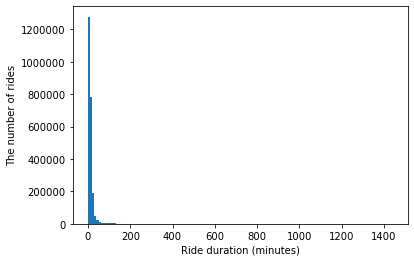

In [18]:
# Create 10 minutes intervals
bin_edges = np.arange(0, bikes['duration_min'].max()+10, 10)

# Create histogram
sb.distplot(bikes['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha': 1})
plt.xlabel('Ride duration (minutes)')
plt.ylabel('The number of rides');

It looks like the majority of rides is shorter than around 100 minutes, and that there are some rides also above 200 minutes, which is unfortunately not visible in the chart above. Let's check the number of these rides with duration above 200 minutes (12,000 seconds):

In [19]:
# The number of rides with long duration
bikes[bikes['duration_min'] > 200].shape[0]

11907

First, try logarithmic scale - use directly duration in minutes this time:

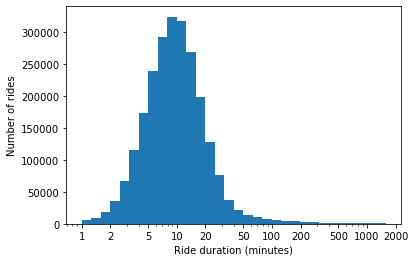

In [32]:
# Histogram with log scaled x-axis
bin_edges = 10 ** np.arange(0, np.log10(bikes['duration_min'].max())+0.1, 0.1)
sb.distplot(bikes['duration_min'], bins = bin_edges, kde=False, hist_kws = {'alpha' : 1})

plt.xscale('log')
tick_locs = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]
plt.xticks(tick_locs, tick_locs)

plt.xlabel('Ride duration (minutes)')
plt.ylabel('Number of rides');

Under the logarithmic scale, data follow unimodal distribution centered around 5-15 minutes that is still skewed to the right. The peak suggests that most of the rides were rather short. 

In [34]:
long_rides = bikes[bikes['duration_min'] > 200]
print('Number of rides with duration above 200 minutes: {}'.format(long_rides.shape[0]))

Number of rides with duration above 200 minutes: 11907


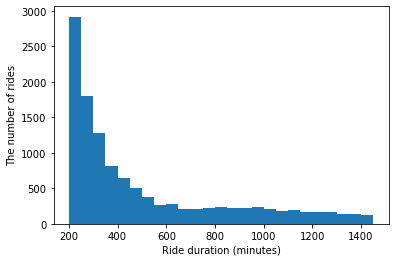

In [38]:
# Create 10 minutes intervals
bin_edges = np.arange(200, long_rides['duration_min'].max()+50, 50)

# Create histogram
sb.distplot(long_rides['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha': 1})
plt.xlabel('Ride duration (minutes)')
plt.ylabel('The number of rides');

The number of rides decreases to about 600 minutes (10 hours), than it stays at more or less constant level. What are these long trips? Do they occur during weekdays or weekends, summer or winter? It might also be a case that someone couldn't bring the bike back the same day and did it only on the next day. But this cannot be determined from the data, so let's focus on the posted questions in further exploration.

__Year, month, day__  
What is the distribution of trips when it comes to year, month, and day? Are there more trips in summer months? Is the beginning of month better than the end?  
Year, month and day are categorical variables in nature, and the values should be logically ordered: from 2017 to 2018, from January to December, and from the first to the last day of month.

In [39]:
# Set the base color for all plots
base_color = sb.color_palette()[0]

In [40]:
# Define function to plot bar charts with absolute counts and relative proportions side by side
def bar_plot(data, x, x_label, y_tick_step = 0.10):
    plt.figure(figsize = (16, 6))

    # Absolute counts
    plt.subplot(1, 2, 1)
    sb.countplot(data = data, x = x, color = base_color)
    plt.xlabel(x_label)
    plt.ylabel('The number of rides')

    # Relative proportions
    max_year_count = data[x].value_counts().values[0]
    all_count = data.shape[0]
    max_proportion = max_year_count/all_count

    tick_props = np.arange(0, max_proportion + y_tick_step, y_tick_step)
    tick_names = ['{:0.2f}'.format(v) for v in tick_props]

    plt.subplot(1, 2, 2)
    sb.countplot(data = data, x = x, color = base_color)
    plt.yticks(tick_props * all_count, tick_names)
    plt.xlabel(x_label)
    plt.ylabel('The proportion of rides');

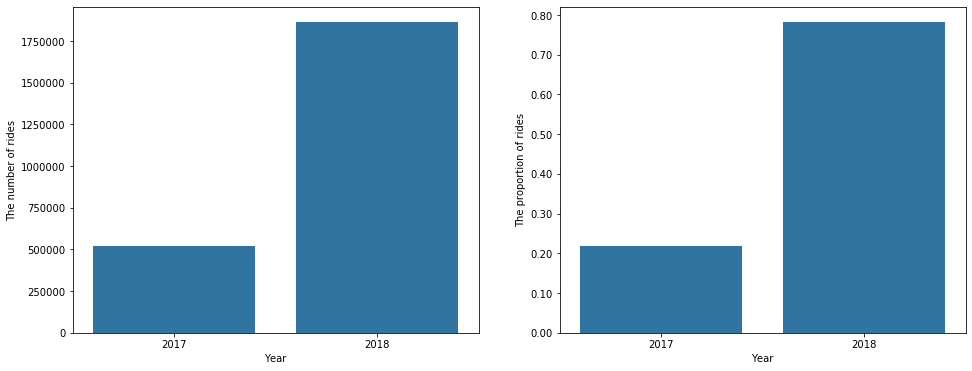

In [41]:
# Bar plots for year
bar_plot(bikes, 'start_year', 'Year')

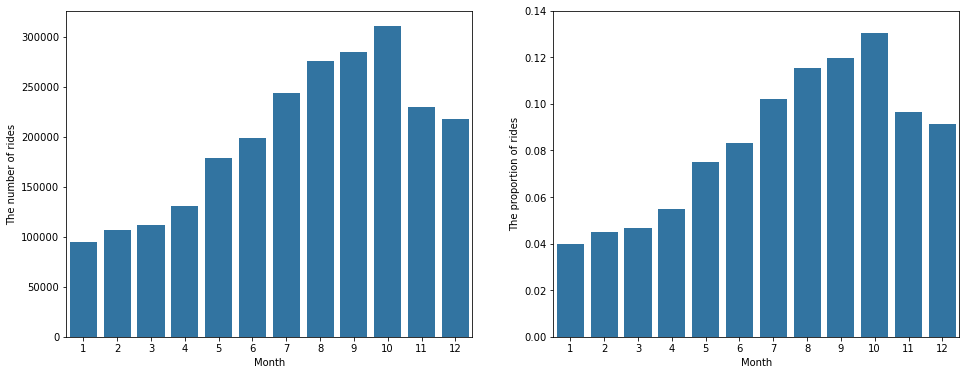

In [42]:
# Bar plots for month
bar_plot(bikes, 'start_month', 'Month', 0.02)

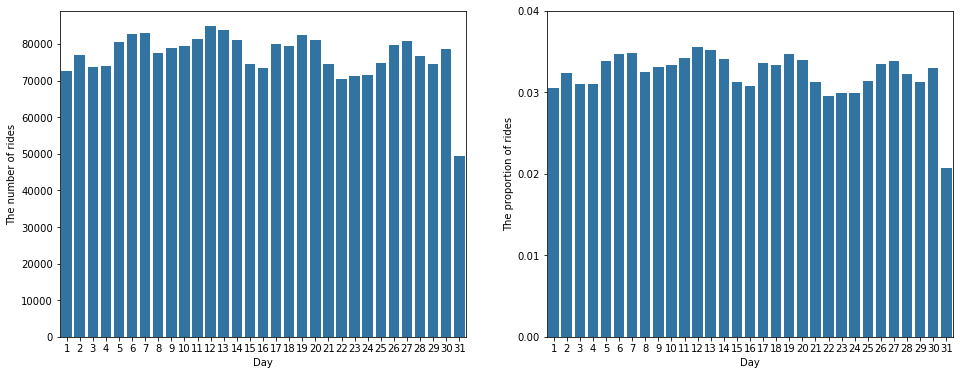

In [43]:
# Bar plots for day of month
bar_plot(bikes, 'start_day', 'Day', 0.01)

__Year__ There is a significant increase of bike rides from 2017 to 2018 - there are around 500,000 rides in 2017, and more than 1,750,000 rides in 2018, which is 1:4 ratio. In other words, the number of rides increased approximately four times from 2017 to 2018. Why is that? Is it possible that the bike sharing system started only later in 2017?  

__Month__ The most trips were made in October followed by September and August. On the contrary, the least trips were made from January to April. Is there a relationship between month and year? Would there be the same pattern when looking at 2017 and 2018 individually?

__Day__ There is quite regular distribution of trips among days. The only exception is the 31st day - but, not all months have 31 days, which could be the reason of the decreased number of rides. 

__Weekday__  
Look at the ride distribution over days in a week - from Monday to Sunday:

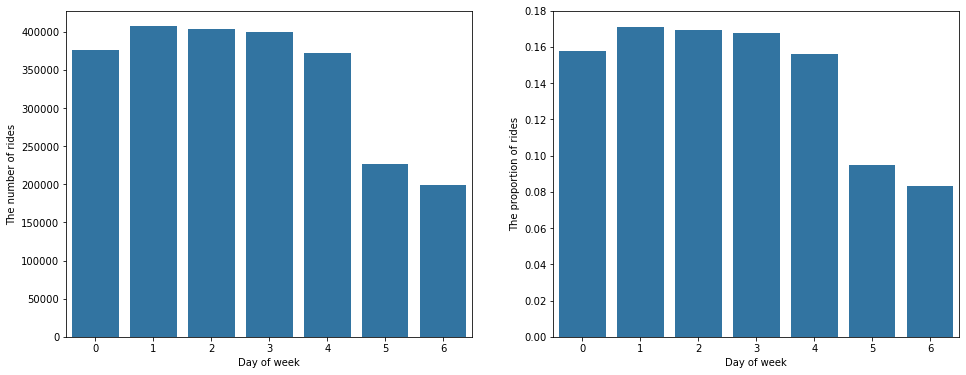

In [44]:
# Bar plots for day of week
# Monday = 0, Sunday = 6
bar_plot(bikes, 'start_weekday', 'Day of week', 0.02)

Week days (from Monday to Friday) have almost equal number of rides. On the contrary, weekends (Saturday and Sunday) are weak. Maybe people use the bikes to travel to school or work? These users could be categorized as subscribers, because it might be more convenient to subscribe in case of regular usage. On the other hand, the bike users on weekends could belong to the second category - casual customers. I'll look at this potential relationship later. 

__Hour of day__  
Let's find out when the majority of rides happens:

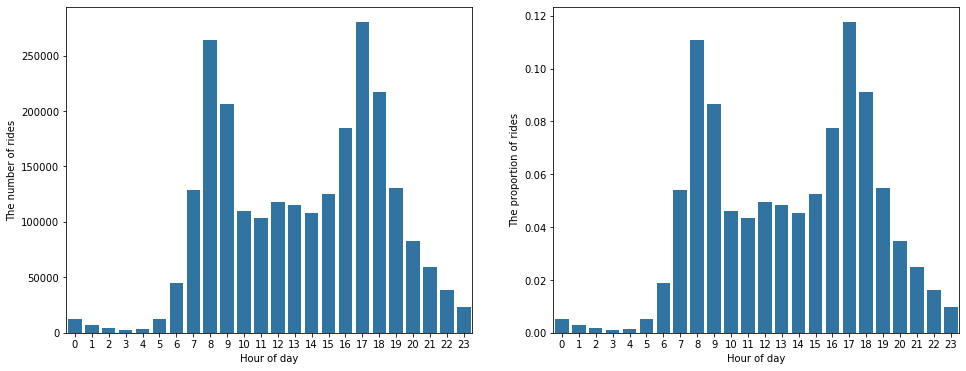

In [45]:
# Bar plots for hour of day
bar_plot(bikes, 'start_hour', 'Hour of day', 0.02)

There are two spikes (bimodal distribution) - at around 8-9 in the morning and at 17-18 in the afternoon. These could correspond to times when people travel to work and from work, or school. There is a local minimum in between. The least number of rides happen at night and early in the morning, i.e. between 0 and 5. The distribution could differ for weekdays and weekends. I'll look deeper in the further exploration. 

__User type__  
There are two types of users - subscribers and casual users (customers). What is their ratio?

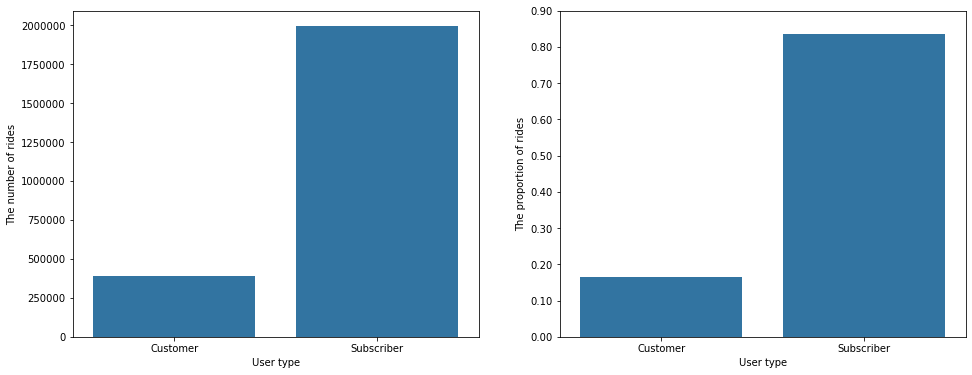

In [46]:
# Bar plots for user_type
bar_plot(bikes, 'user_type', 'User type', 0.1)

In [47]:
# Check the numbers
bikes['user_type'].value_counts()

Subscriber    1992784
Customer       390637
Name: user_type, dtype: int64

The vast majority of users are subscribers. It would be interesting to know when the two user types use the bike-sharing system the most - as already suggested above.

## Bivariate Exploration

__Year vs. month__

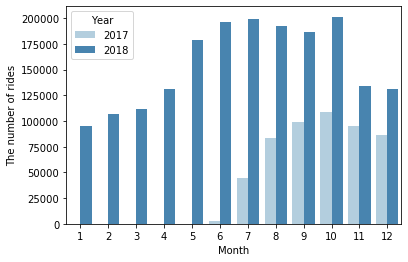

In [48]:
# Create clustered bar chart to show relationship year - month
sb.countplot(data = bikes, x = 'start_month', hue = 'start_year', palette = 'Blues')
plt.legend(title = 'Year', loc = 'upper left')
plt.xlabel('Month')
plt.ylabel('The number of rides');

Data for 2017 is not complete - Ford GoBike began operation only in June 2017 (see [Bay Wheels](https://en.wikipedia.org/wiki/Bay_Wheels)). The number of users was increasing from June 2017 to October 2017, then it slightly dropped in November-December 2017. Still, the number of users was higher in January 2018 when compared to December 2017.  
In 2018, the most rides occurred from May to October. This observation differs from the observation made on the basis of the univariate month bar chart above, where June and July had significantly less bike rides comparing to autumn months.

__Month vs. day__  
Create a heatmap to show the number of rides distribution over months and days.

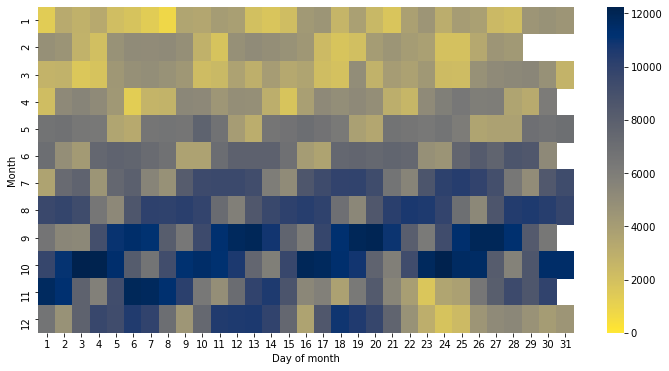

In [91]:
# Create proper data structure for a heatmap
ride_counts = bikes.groupby(['start_day', 'start_month']).size()
ride_counts = ride_counts.reset_index(name = 'count')
ride_counts = ride_counts.pivot(index = 'start_month', columns = 'start_day', values = 'count')

# Create a heatmap
plt.figure(figsize = (12, 6))
sb.heatmap(ride_counts, cmap = 'cividis_r', vmin = 0)
plt.xlabel('Day of month')
plt.ylabel('Month');

Let's create separate heatmaps for 2017 and 2018. First step is to generate proper data structures that can be visualized as a heatmap. The table for the 2017 data had to be adjusted to contain rows for missing months (January - June) to generate heatmaps with the same axes. A post on stackoverflow [Take multiple lists into dataframe](https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe) was helpful when creating dummy dataframe.

In [174]:
# Create proper data structures - one for 2017 and one for 2018 rides
# 2018
ride_counts_18 = bikes[bikes['start_year'] == 2018].groupby(['start_day', 'start_month']).size()
ride_counts_18 = ride_counts_18.reset_index(name = 'count')
ride_counts_18 = ride_counts_18.pivot(index = 'start_month', columns = 'start_day', values = 'count')

# 2017 data is not complete - add empty values for January to June to get same axes for both 2017 and 2018 heatmaps
ride_counts_17 = bikes[bikes['start_year'] == 2017].groupby(['start_day', 'start_month']).size()
ride_counts_17 = ride_counts_17.reset_index(name = 'count')

months = np.arange(1, 7)
day = [1] * 6
count = np.NaN
add_counts = pd.DataFrame({'start_day': day, 'start_month': months, 'count': count})
ride_counts_17 = pd.concat([ride_counts_17, add_counts], ignore_index = True, axis = 0, sort = False)

ride_counts_17 = ride_counts_17.pivot(index = 'start_month', columns = 'start_day', values = 'count')

I added one colorbar for both heatmaps with the help of code in [One horizontal colorbar for seaborn heatmaps subplots and Annot Issue with xticklabels](https://stackoverflow.com/questions/45122416/one-horizontal-colorbar-for-seaborn-heatmaps-subplots-and-annot-issue-with-xtick).

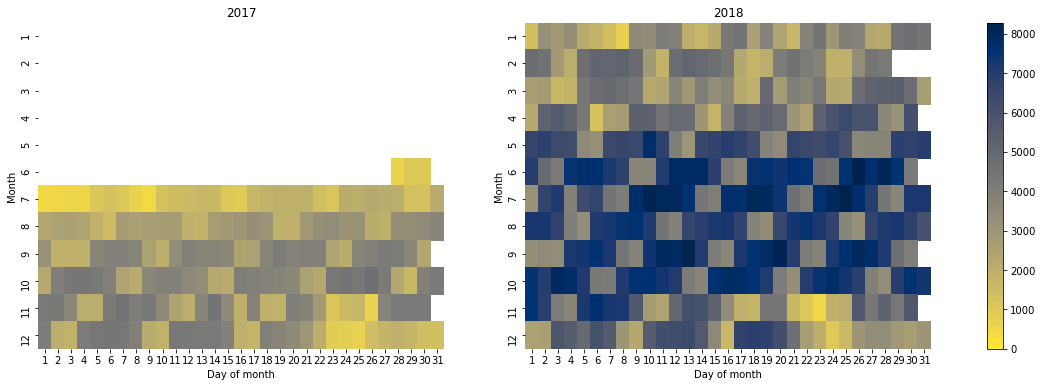

In [175]:
# Create heatmaps
plt.figure(figsize = (20, 6))
min_count = 0
max_count = ride_counts_18.max().max()

# Right
plt.subplot(1, 2, 2)
ax1 = sb.heatmap(ride_counts_18, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Day of month')
plt.ylabel('Month')
plt.title('2018')

# Left
plt.subplot(1, 2, 1)
ax2 = sb.heatmap(ride_counts_17, cmap = 'cividis_r', vmin = min_count, vmax = max_count, cbar = False)
plt.xlabel('Day of month')
plt.ylabel('Month')
plt.title('2017')

mappable = ax1.get_children()[0]
plt.colorbar(mappable, ax = [ax1, ax2], orientation = 'vertical');